# Explore here

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import random
import glob
import shutil

# Set the directory
os.chdir('/workspaces/CNN/data/raw/sampled-dogs-and-cats')

# Create directories if they do not exist
if not os.path.isdir('train/dog'):
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')  # Corrected from 'valid.cat'
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    # Move images into train, valid, and test directories
    for c in random.sample(glob.glob('cat*'), 40):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 40):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 10):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 10):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 5):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 5):
        shutil.move(c, 'test/dog')

print("Dataset organized into train, valid, and test directories.")


2024-08-04 01:03:13.754650: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 01:03:14.739313: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 01:03:15.070818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 01:03:15.684192: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 01:03:15.862248: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 01:03:16.923481: I tensorflow/core/platform/cpu_feature_gu

Dataset organized into train, valid, and test directories.


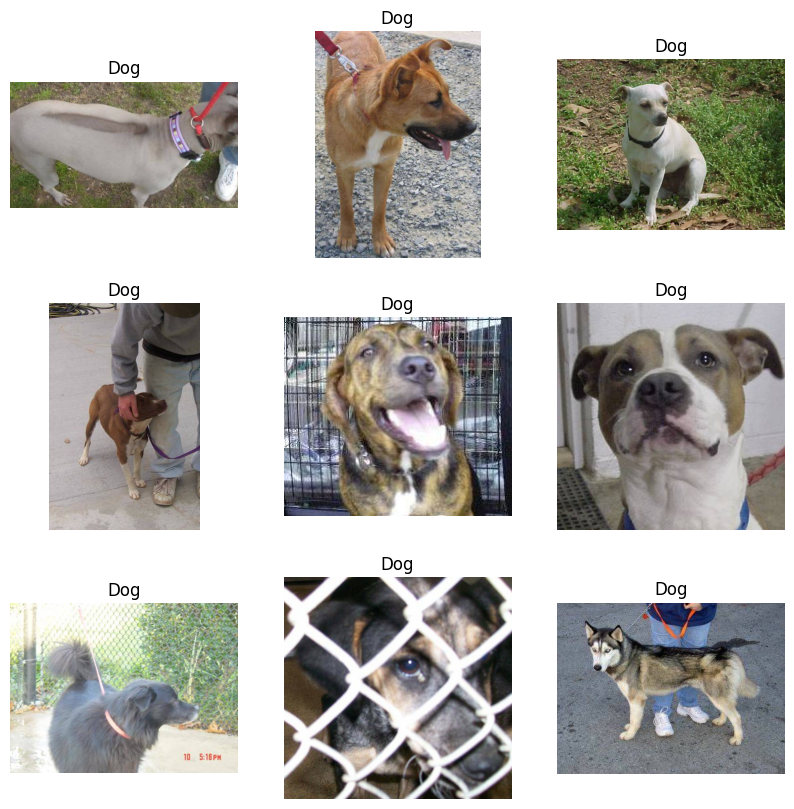

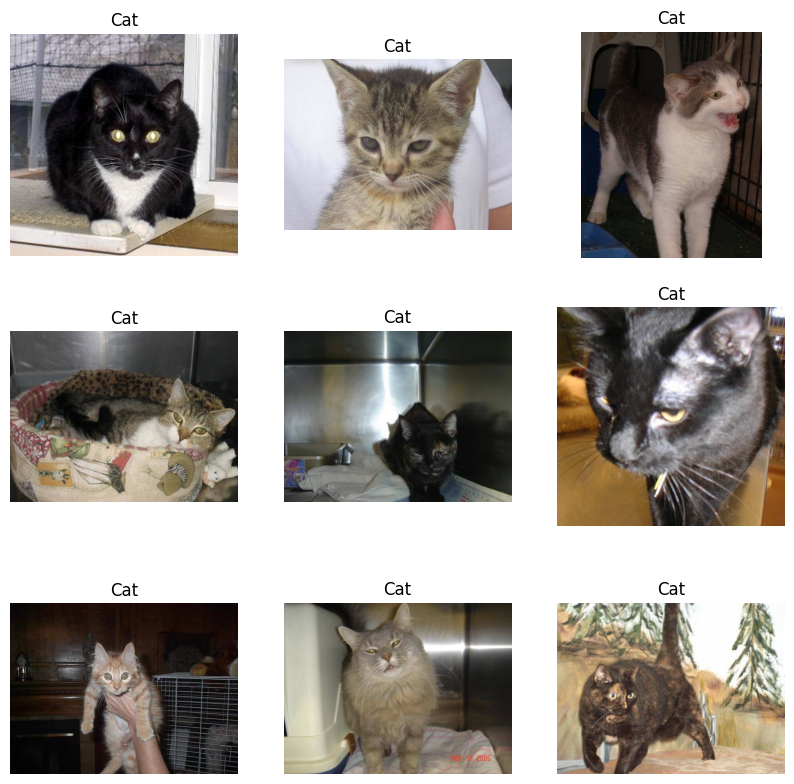

Found 88 images belonging to 3 classes.
Found 22 images belonging to 3 classes.


In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for cat and dog images
cat_train_folder = '/workspaces/CNN/data/raw/sampled-dogs-and-cats/train/cat'
dog_train_folder = '/workspaces/CNN/data/raw/sampled-dogs-and-cats/train/dog'

# Function to load and display images using Pillow
def display_images(image_paths, folder_path, title):
    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(image_paths):
        img_path = os.path.join(folder_path, img_name)  # Use the correct folder path
        img = Image.open(img_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display first nine dog images
dog_images = [img for img in os.listdir(dog_train_folder) if 'dog' in img][:9]
display_images(dog_images, dog_train_folder, 'Dog')

# Display first nine cat images
cat_images = [img for img in os.listdir(cat_train_folder) if 'cat' in img][:9]
display_images(cat_images, cat_train_folder, 'Cat')

# Image Preprocessing and Augmentation
IMG_SIZE = 224
BATCH_SIZE = 20

datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to [0,1]
    validation_split=0.2,    # Split 20% for validation
    rotation_range=20,       # Rotate images by 20 degrees
    width_shift_range=0.2,   # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom in by 20%
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill in missing pixels
)

# Create data generators for training and validation sets
train_generator = datagen.flow_from_directory(
    '/workspaces/CNN/data/raw/sampled-dogs-and-cats',  # Correct train folder path
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',    # Use binary classification
    subset='training'       # Use the 'training' subset
)

validation_generator = datagen.flow_from_directory(
    '/workspaces/CNN/data/raw/sampled-dogs-and-cats',  # Correct train folder path
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',    # Use binary classification
    subset='validation'     # Use the 'validation' subset
)


In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from keras.models import Model 
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-04 01:06:31.378782: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 177209344 exceeds 10% of free system memory.
2024-08-04 01:06:31.621237: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 177209344 exceeds 10% of free system memory.
2024-08-04 01:06:31.682272: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 177209344 exceeds 10% of free system memory.


In [13]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Add callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')  # Use .keras extension
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')


In [15]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10,  # You can increase the number of epochs for better accuracy
    callbacks=[checkpoint, early_stopping]  # Include callbacks
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 11s/step - accuracy: 0.5104 - loss: 0.7230 - val_accuracy: 0.5000 - val_loss: 0.7717
Epoch 2/10


2024-08-04 01:22:43.348074: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7718
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 10s/step - accuracy: 0.5104 - loss: 0.7359 - val_accuracy: 0.5000 - val_loss: 0.6873
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.4479 - loss: 0.6988 - val_accuracy: 0.2500 - val_loss: 0.6897
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6824
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6562 - loss: 0.6760 - val_accuracy: 0.2500 - val_loss: 0.6931
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6913
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 12s/step - accuracy: 0.5312 - loss: 0.6893 - val_accuracy: 0.7500 - 

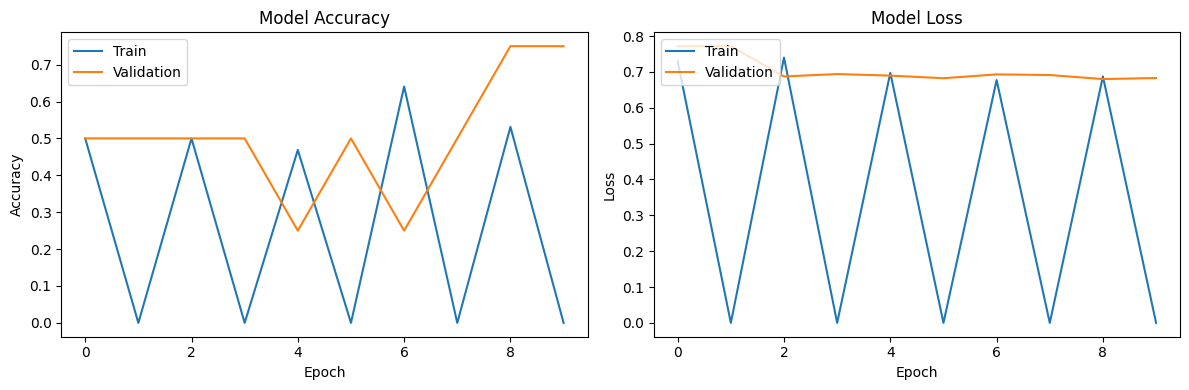

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
